In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow.keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
import gc

In [3]:
gc.collect()

0

In [4]:
img = image.load_img("D:/MIT_AT/AI_dataset/train/cap/WIN_20220609_13_34_24_Pro_jpg.rf.009e64ecebe2e3aba8b350fed637bd1f.jpg")

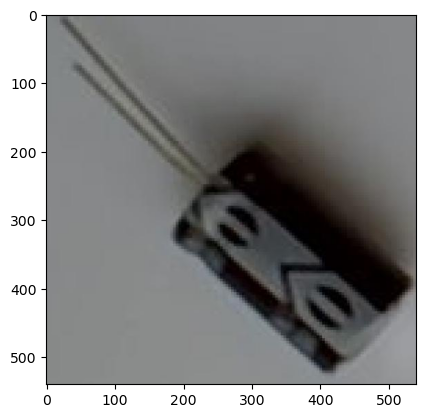

In [5]:
plt.imshow(img)

In [6]:
cv2.imread("D:/MIT_AT/AI_dataset/train/cap/WIN_20220609_13_34_24_Pro_jpg.rf.009e64ecebe2e3aba8b350fed637bd1f.jpg")

array([[[135, 134, 130],
        [135, 134, 130],
        [135, 134, 130],
        ...,
        [137, 135, 134],
        [137, 135, 134],
        [137, 135, 134]],

       [[135, 134, 130],
        [135, 134, 130],
        [135, 134, 130],
        ...,
        [137, 135, 134],
        [137, 135, 134],
        [137, 135, 134]],

       [[135, 134, 130],
        [135, 134, 130],
        [135, 134, 130],
        ...,
        [137, 135, 134],
        [137, 135, 134],
        [137, 135, 134]],

       ...,

       [[137, 138, 136],
        [137, 138, 136],
        [137, 138, 136],
        ...,
        [152, 150, 149],
        [152, 150, 149],
        [152, 150, 149]],

       [[137, 138, 136],
        [137, 138, 136],
        [137, 138, 136],
        ...,
        [152, 150, 149],
        [152, 150, 149],
        [152, 150, 149]],

       [[137, 138, 136],
        [137, 138, 136],
        [137, 138, 136],
        ...,
        [152, 150, 149],
        [152, 150, 149],
        [152, 150, 149]]

In [7]:
cv2.imread("D:/MIT_AT/AI_dataset/train/cap/WIN_20220609_13_34_24_Pro_jpg.rf.009e64ecebe2e3aba8b350fed637bd1f.jpg").shape

(540, 540, 3)

In [8]:
cv2.imread("D:/MIT_AT/AI_dataset/train/cap/WIN_20220609_13_34_24_Pro_jpg.rf.009e64ecebe2e3aba8b350fed637bd1f.jpg").max()

162

In [9]:
from glob import glob

In [10]:
IMAGE_SIZE = [224, 224]

In [11]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [12]:
for layer in vgg.layers:
    layer.trainable = False

In [13]:
folders = glob('D:/MIT_AT/AI_dataset/train/*')

In [14]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1.0 / 255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_dategen = ImageDataGenerator(rescale = 1.0/255.0)

target_size=(224, 224)
batch_size=32
class_mode='categorical'

train_generator = train_datagen.flow_from_directory("D:/MIT_AT/AI_dataset/train",

    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode,
    shuffle=True # set this to True for training data
)

validation_generator = test_dategen.flow_from_directory("D:/MIT_AT/AI_dataset/validation",
      
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode,
    shuffle=False  # set to False for validation data
)

Found 691 images belonging to 3 classes.
Found 85 images belonging to 3 classes.


In [15]:
print(f'classes in training dataset: ', train_generator.class_indices)
print(f'classes in validation dataset:', validation_generator.class_indices)

classes in training dataset:  {'cap': 0, 'pot': 1, 'reg': 2}
classes in validation dataset: {'cap': 0, 'pot': 1, 'reg': 2}


In [16]:
print(f'array of the training dataset: \n', train_generator.classes)
print(f'array of the validation dataset: \n', validation_generator.classes)

array of the training dataset: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [17]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
from tensorflow import keras

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, verbose=1)

In [21]:
gc.collect()

137

In [22]:
gc.collect()

0

In [23]:
r = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[early_stop]
)

Epoch 1/20
22/22 [==============================] - 72s 3s/step - loss: 0.9774 - accuracy: 0.6324 - val_loss: 0.3567 - val_accuracy: 0.8353
Epoch 2/20
22/22 [==============================] - 72s 3s/step - loss: 0.2410 - accuracy: 0.9175 - val_loss: 0.1889 - val_accuracy: 0.9412
Epoch 3/20
22/22 [==============================] - 73s 3s/step - loss: 0.1356 - accuracy: 0.9638 - val_loss: 0.1177 - val_accuracy: 0.9882
Epoch 4/20
22/22 [==============================] - 73s 3s/step - loss: 0.0859 - accuracy: 0.9870 - val_loss: 0.1030 - val_accuracy: 1.0000
Epoch 5/20
22/22 [==============================] - 72s 3s/step - loss: 0.0632 - accuracy: 0.9986 - val_loss: 0.0903 - val_accuracy: 1.0000
Epoch 6/20
22/22 [==============================] - 72s 3s/step - loss: 0.0540 - accuracy: 0.9971 - val_loss: 0.0866 - val_accuracy: 0.9882
Epoch 7/20
22/22 [==============================] - 72s 3s/step - loss: 0.0433 - accuracy: 0.9986 - val_loss: 0.0857 - val_accuracy: 0.9882
Epoch 8/20
22/22 [==

In [24]:
model.evaluate(validation_generator)

3/3 [==============================] - 8s 2s/step - loss: 0.0671 - accuracy: 0.9882


[0.06709306687116623, 0.9882352948188782]

In [25]:
model.save('my_cnn_model.h5')

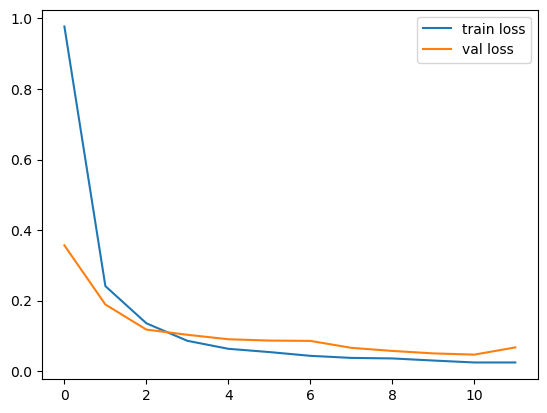

<Figure size 640x480 with 0 Axes>

In [26]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

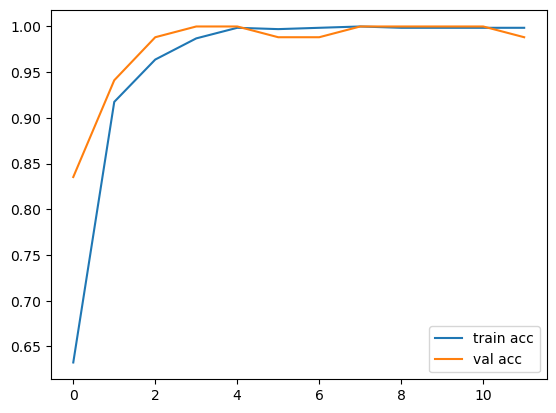

<Figure size 640x480 with 0 Axes>

In [27]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:
dir_path = "D:/MIT_AT/AI_dataset/test"

for i in os.listdir(dir_path):
    print(i)

WIN_20220609_13_28_43_Pro_jpg.rf.32ec84edeb423c0eee2c77e91719c464.jpg
WIN_20220609_13_28_43_Pro_jpg.rf.6d07744927ba08dc6e38c253ba7bf87c.jpg
WIN_20220609_13_28_43_Pro_jpg.rf.a84282fecd538c2316c8bd0975402c46.jpg
WIN_20220609_13_28_43_Pro_jpg.rf.bca836605d80350ce67a6559dbe22e0f.jpg
WIN_20220609_13_28_43_Pro_jpg.rf.d94ff7cb4c9b1191d7f7dc05c90553ce.jpg
WIN_20220609_13_32_27_Pro_jpg.rf.81716e3c322e5e01416eabae2ef61b9b.jpg
WIN_20220609_13_32_27_Pro_jpg.rf.c3698c95f148591e6774d1aca96415b0.jpg
WIN_20220609_13_32_27_Pro_jpg.rf.d25d7843059ef06aa4359718029910f2.jpg
WIN_20220609_13_32_47_Pro_jpg.rf.1896f1d4046ff77e78d199e8460d7a6f.jpg
WIN_20220609_13_32_47_Pro_jpg.rf.659412b4f61a81d69e74964078270a08.jpg
WIN_20220609_13_32_47_Pro_jpg.rf.8283700a93a1cf3c20563cd41378cb2e.jpg
WIN_20220609_13_32_47_Pro_jpg.rf.86397fe99c3a4e1328381dc9b4da716f.jpg
WIN_20220609_13_32_47_Pro_jpg.rf.d4ddc0631062ec836acd16e451d3014e.jpg
WIN_20220609_13_32_47_Pro_jpg.rf.d7e182168747cc512442244ce129b7b3.jpg
WIN_20220609_13_32_4

In [29]:
import random

In [30]:
class_labels = ['Capacitor','Potentiometer','Regulator']

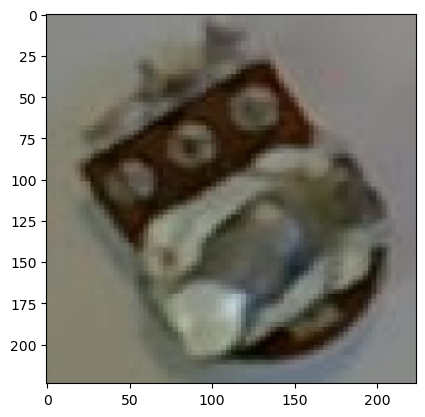

1/1 [==============================] - 0s 266ms/step
[[4.1732480e-04 9.8779184e-01 1.1790821e-02]]
Predicted Class: Potentiometer


In [35]:
# To get a random index within the range of the generator size
idx = random.randint(0, len(validation_generator)-1)

# TO get an image batch and labels batch at the selected index
image_batch, label_batch = validation_generator[idx]

# Take the first image from the batch)
sample_image = image_batch[18]

# Display the image
plt.imshow(sample_image)
plt.show()

# Make a prediction for the image
pred = model.predict(sample_image.reshape(1, 224, 224, 3))

print(pred)

predicted_class_index = np.argmax(pred)

predicted_class_label = class_labels[predicted_class_index] # Get the corresponding class label

print("Predicted Class:", predicted_class_label)

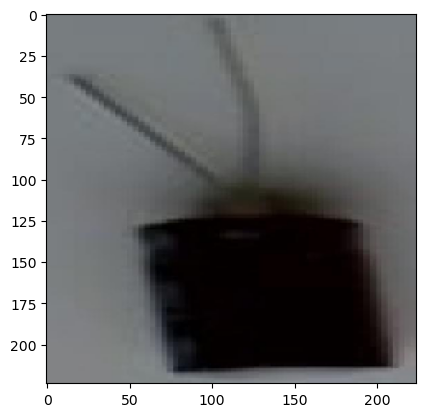

1/1 [==============================] - 0s 308ms/step
[[0.9857922  0.00624051 0.00796717]]
Predicted Class: Capacitor


In [38]:
# To get a random index within the range of the generator size
idx = random.randint(0, len(validation_generator)-1)

# TO get an image batch and labels batch at the selected index
image_batch, label_batch = validation_generator[idx]

# Take the first image from the batch)
sample_image = image_batch[3]

# Display the image
plt.imshow(sample_image)
plt.show()

# Make a prediction for the image
pred = model.predict(sample_image.reshape(1, 224, 224, 3))

print(pred)

predicted_class_index = np.argmax(pred)

predicted_class_label = class_labels[predicted_class_index] # Get the corresponding class label

print("Predicted Class:", predicted_class_label)

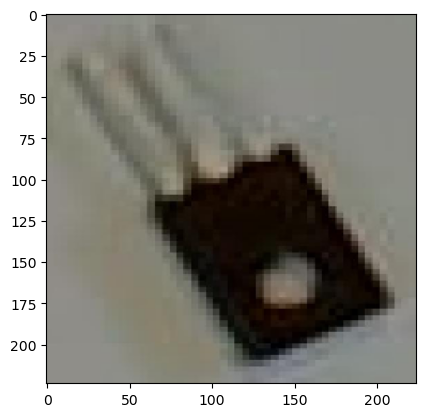

1/1 [==============================] - 0s 310ms/step
[[0.07237719 0.00416603 0.9234567 ]]
Predicted Class: Regulator


In [39]:
# To get a random index within the range of the generator size
idx = random.randint(0, len(validation_generator)-1)

# TO get an image batch and labels batch at the selected index
image_batch, label_batch = validation_generator[idx]

# Take the first image from the batch)
sample_image = image_batch[14]

# Display the image
plt.imshow(sample_image)
plt.show()

# Make a prediction for the image
pred = model.predict(sample_image.reshape(1, 224, 224, 3))

print(pred)

predicted_class_index = np.argmax(pred)

predicted_class_label = class_labels[predicted_class_index] # Get the corresponding class label

print("Predicted Class:", predicted_class_label)